<a href="https://colab.research.google.com/github/hashimsayed0/analytics-evaluation/blob/master/Analytics_Evaluation_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 2

A team of plantation planners are concerned about the yield of oil palm trees, which seems to
fluctuate. They have collected a set of data and needed help in analysing on how external
factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of
oil palm tree determines the FFB yield, and are linked to the external factors. Perform the
analysis, which requires some study on the background of oil palm tree physiology.



#Solution

This is a feature selection problem as we're interested in finding out which variable contributes most in determining the value of output variable, FFB_Yield

#Import the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Import the dataset and explore it

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/hashimsayed0/analytics-evaluation/master/palm_ffb.csv')

In [5]:
data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
Date             130 non-null object
SoilMoisture     130 non-null float64
Average_Temp     130 non-null float64
Min_Temp         130 non-null float64
Max_Temp         130 non-null float64
Precipitation    130 non-null float64
Working_days     130 non-null int64
HA_Harvested     130 non-null float64
FFB_Yield        130 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [7]:
data.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

# Analysing the dsitributions

Number of numerical variables:  8


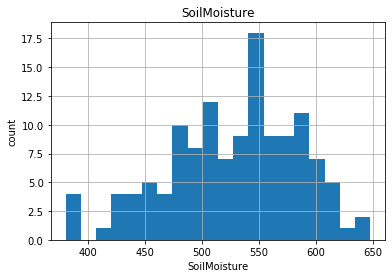

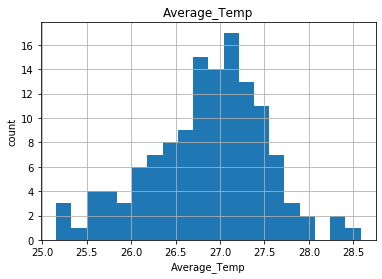

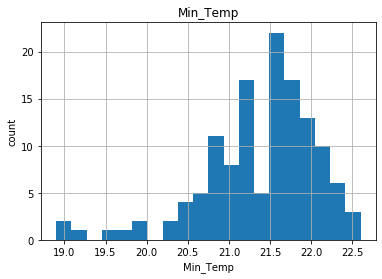

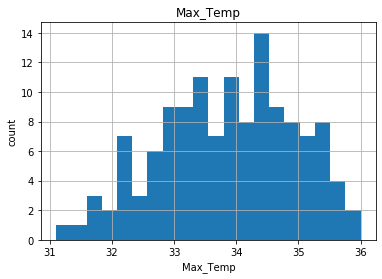

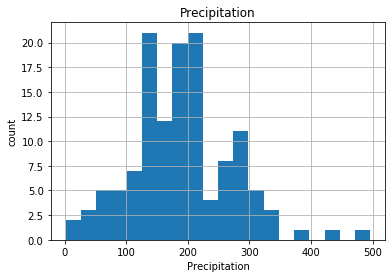

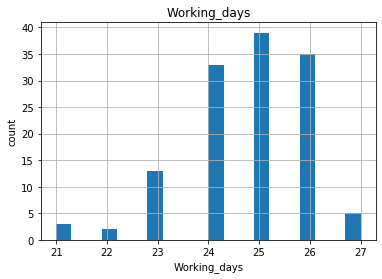

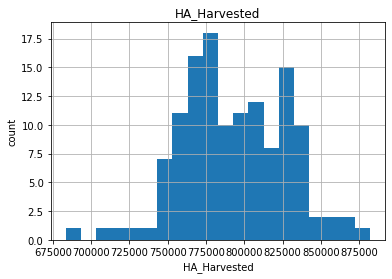

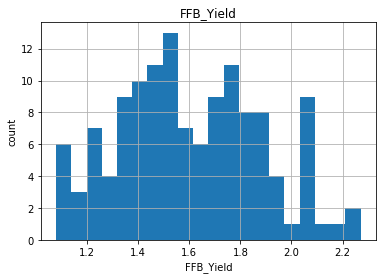

In [8]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(data, var)

Summary

min_temp is slightly skewed. Other features are normally distributed

# Finding correlation between variables

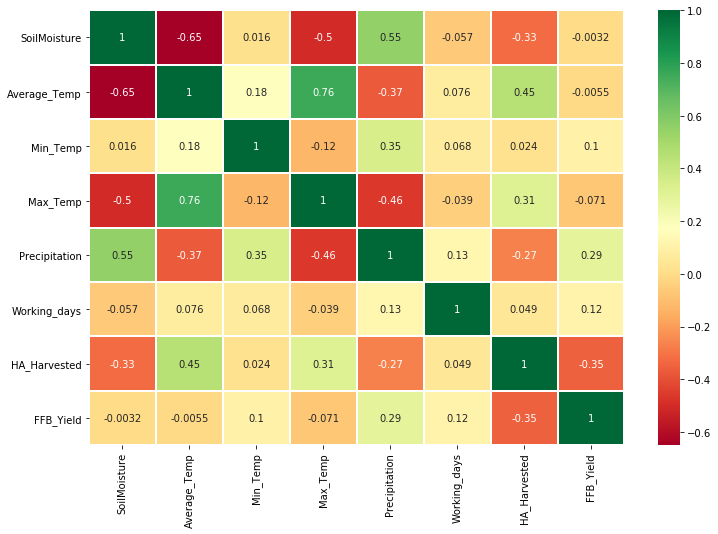

In [9]:
#Using Pearson Correlation
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

## Summary

Soil Moisture shows positive correlation with Precipitation and negative correlation with Avergae Temp and Mx Temp



In [10]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


## Choosing best features using feature selector

In [0]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs

In [0]:
X = data.drop(['FFB_Yield','Date'],axis=1)
y = data.FFB_Yield

In [17]:
emodel = efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2',n_jobs=-1)
miniData = X[X.columns]

emodel.fit(np.array(miniData),y)

Features: 127/127

ExhaustiveFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

In [18]:
#Get the selected feature index
emodel.best_idx_

(0, 2, 4, 5, 6)

In [21]:
#Get the best features
miniData.columns[list(emodel.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'Working_days',
       'HA_Harvested'],
      dtype='object')

#Summary

Most dominating features are Soil Moisture, Min Temp, Precipitation, Working days and HA Harvested.

<br> These variables are good enough for predicting the value of FFB Yield, i.e, these features provide adequate information to predict how much the FFB yield would be for a particular date.